In [1]:
n = 100
z = rnorm(n)
epsilon = rnorm(n)
delta = rnorm(n)
x = 10*z + epsilon
y = 10*z + delta

In [3]:
W = cbind(x,y,z)
head(W)

x,y,z
6.439138,7.000313,0.7686152
3.005654,3.604379,0.4828414
1.528523,2.554331,0.1671311
-12.034939,-14.304117,-1.3966699
15.209240,15.286289,1.5143661
-4.126943,-3.400246,-0.4187940


In [4]:
(sigma = cov(W))

,x,y,z
x,108.15963,107.18089,10.823628
y,107.18089,108.12875,10.837006
z,10.82363,10.83701,1.094452


In [5]:
(omega <- solve(sigma))

,x,y,z
x,0.893827373,-0.008491838,-8.755462
y,-0.008491838,1.214838710,-11.945072
z,-8.755462451,-11.945072140,205.778594


In [6]:
(theta_hat = -omega[1,2]/sqrt(omega[1,1]*omega[2,2]))

[1] 0.008149211

In [16]:
partial_correlation = function(x,y,z){
    W = cbind(x,y,z)
    sigma= cov(W)
    omega = solve(sigma)
    theta_hat = -omega[1,2]/sqrt(omega[1,1]*omega[2,2])
    return(theta_hat)
    
}

In [77]:
B = 1000
Tboot = rep(0,B)
for (i in 1:B){
    #xx = sample(x,n,replace=TRUE)
    #yy = sample(y,n,replace=TRUE)
    #zz = sample(z,n,replace=TRUE)
    index <- sample(1:n,n,replace=TRUE)
    xx = x[index]
    yy = y[index]
    zz = z[index]
    
    Tboot[i] = partial_correlation(xx,yy,zz)
    }

In [78]:
(se <- sqrt(var(Tboot)))

[1] 0.09419687

In [79]:
Normal = c(theta_hat+se*qnorm(0.025),theta_hat+se*qnorm(0.975))
Percentile = c(quantile(Tboot,0.025),quantile(Tboot,0.975))
Pivoat = c(2*theta_hat-quantile(Tboot,0.975),2*theta_hat-quantile(Tboot,0.025))

In [82]:
######95% interval
Normal
Percentile
Pivoat

[1] -0.1764733  0.1927717

2.5%      97.5% 
-0.1697079  0.1914184

97.5%       2.5% 
-0.1751200  0.1860063

In [90]:
a = 1
b = 3
n = 10
tau = (a+b)/2
B = 10000
tau.hat = rep(0,B)
for (i in 1:B){
    x = runif(n, a, b)
    tau.hat[i] = (min(x) + max(x))/2 }

MSE.tau.hat = (mean(tau.hat) - tau)^2 + var(tau.hat) 
MSE.tau.tilde = (b-a)^2/(12*n)
(MSE.tau.hat)
(MSE.tau.tilde)


[1] 0.01542162

[1] 0.03333333

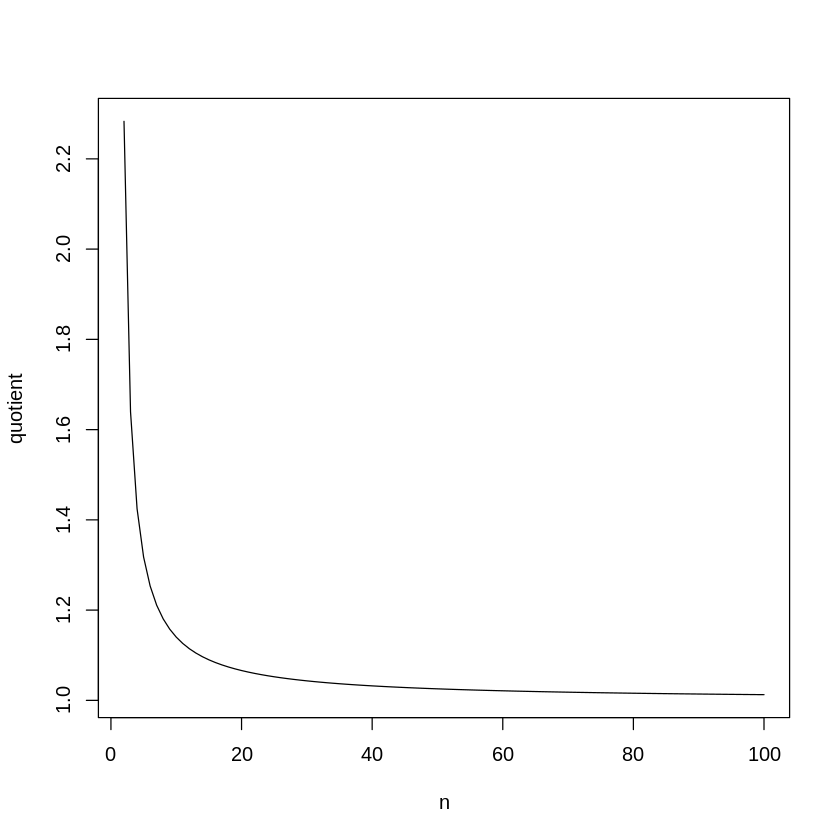

In [100]:
n = seq(2,100,1)
quotient = (n*(n-1))*(gamma((n-1)/2))^2/(gamma(n/2))^2-2*n
plot(n,quotient,type='l')                          

In [103]:
n=199
n*(n-1)*(gamma((n-1)/2))^2/(gamma(n/2))^2-2*n

[1] NaN

In [116]:
Twain = c(.225,.262, .217, .240, .230, .229, .235, .217)
Snodgrass = c(.209, .205, .196, .210, .202, .207, .224, .223, .220, .201)

[1] 0.0315

In [135]:
# u1: means of Twain essays
# u2: means of Snodgrass essays
# delta = u1-u2
###H0: delta=0, H1: delta != 0

In [122]:
####Wald Test
B = 1000
n=10
delta = mean(Twain)-mean(Snodgrass)
Tboot = rep(0,B)
for (i in 1:B){
    T = sample(Twain,n,replace=TRUE)
    S = sample(Snodgrass,n,replace=TRUE)
    Tboot[i] = mean(T)-mean(S)
}
se.hat <- sqrt(var(Tboot))
######95% interval of dealta
(CI.delta = c(delta+qnorm(0.025)*se.hat,delta-qnorm(0.025)*se.hat))

[1] 0.01207579 0.03227421

In [128]:
W = delta-0/se.hat
#####p-value is
(pvalue = 2*pnorm(-W))

[1] 0.9823084

In [151]:
####Permutation test
t_obs = abs(mean(Twain)-mean(Snodgrass))
T = c(Twain,Snodgrass)
B = 10000
Sum = 0
for (i in 1:B){
    T_permu = sample(T,18,replace=FALSE)
    Ti = abs(mean(T_permu[1:8])-mean(T_permu[9:18]))
    if(Ti>t_obs){
        Sum = Sum+1
    }
}
####p-value is 
(pvalue = Sum/B)

[1] 6e-04

In [152]:
t.test(Twain,Snodgrass) 


	Welch Two Sample t-test

data:  Twain and Snodgrass
t = 3.7036, df = 11.671, p-value = 0.003156
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.009088475 0.035261525
sample estimates:
mean of x mean of y 
 0.231875  0.209700 


In [187]:
Posterior = function(x,n,b){
    u = sqrt(n*b^2+1)
    w = exp(b^2*n^2*x^2/2/u)/u
    prob = 1/(1+w)
    return(prob)
}

pvalue = function(x,n){
    pval = 2*pnorm(-sqrt(n)*abs(x))
    return(pval)
}


In [178]:
#we let 
n= 100

In [179]:
(Posterior(1,n,1))

[1] 8.562098e-216

In [181]:
(Posterior(1,n,0.1))

[1] 6.250091e-16

In [182]:
(Posterior(1,n,0.01))

[1] 0.3792946

In [188]:
(pvalue(1,n))

[1] 1.523971e-23

In [190]:
(Posterior(0.1,n,0.01))

[1] 0.5

In [194]:
(Posterior(0.01,n,0.01))

[1] 0.5012314

In [193]:
(Posterior(-0.01,n,0.01))

[1] 0.5012437

In [195]:
(Posterior(-0.1,n,0.01))

[1] 0.5

In [196]:
(Posterior(-1,n,0.01))

[1] 0.3792946

In [197]:
(pvalue(0.01,n))

[1] 0.9203443

In [198]:
(pvalue(0.1,n))

[1] 0.3173105